# Building a simple Content-Based Recommender System for Netflix Movies and TV Shows

### Objective
With over 6000 movie and tv shows in a sample dataset, there is an overwhelming number of entertainment options available to Netflix users. As such, the purpose of this project aims to make a TV show / movie recommendation using a simple content based recommender system. We would take in an input which is a user's personal favourite show/movies and pick up the top 10 films that are most similar to the personal favourite. Here, we explore 2 possible ways to identify similar items: (1) a simple similarity measure - Cosine Similarity (2) Clustering Algorithm - Latent Dirichlet Allocation (LDA).

### Basics on Recommender System
Recommender Systems can be generally divided into 2 categories: Collaborative Filtering System and Content-based Recommender System. A Collaborative Filtering recommends an item that other users of similar characteristics have liked in the past. A content-based recommender system recommends an item which are similar to the ones the user has liked in the past. Since the given dataset only contains item data, we would focus on creating a basic content-based recommender system. 

### Basics on Text Similarity

There are various text similarity metrics and one of the popular metrics is Cosine Similarity. 
Consine Similarity measures the similarity between 2 documents by measuring the consine of angle between two vectors. Here's a simple example to illustrate the calculation of cosine similarity:



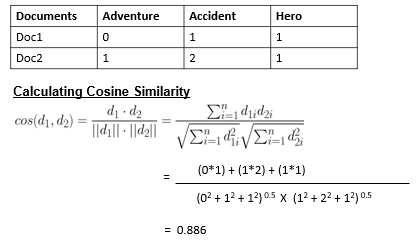

### Basics on Topic Modelling
Topic Modelling is an unsupervised learning technique which groups documents based on the content similarity. One popular algorithm is Latent Dirichlet Allocation (LDA). In LDA, each topic is a probability distribution of words and each document is a probability distribution of topics. The more similar the documents are, the closer they are to each other in the multi-dimensional vector space, thus forming clusters. 




### References
https://www.cse.iitk.ac.in/users/nsrivast/HCC/Recommender_systems_handbook.pdf

https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0


### 1. Cosine Similarity

Cosine similarity is computed based on the features - 'title', 'type', 'listed_in', 'director', 'cast', 'rating' and 'description'.

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [7]:
df = pd.read_csv("./input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### 1.1 Data Pre-Processing

In [41]:
cols = ['title', 'type', 'listed_in', 'director', 'cast', 'rating', 'description']
df['combined'] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# remove non-english words. Reference: https://datascience.stackexchange.com/questions/46705/to-remove-chinese-characters-as-features
df['combined'] = df['combined'].map(lambda x: re.sub("([^\x00-\x7F])+","", x))

#### 1.2 Creating Document Vectors

In [42]:
documents = df['combined']

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english') # convert all words to lowercase and remove stop words
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe 
doc_term_matrix = sparse_matrix.todense()
matrix_df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), index=df.index)


#### 1.3 Computing Cosine Similarity between each document

In [43]:
similarity_scores = cosine_similarity(sparse_matrix, sparse_matrix) 

scores_df = pd.DataFrame(similarity_scores )
scores_df

,0,1,2,3,4,5,6,7,8,9,...,6224,6225,6226,6227,6228,6229,6230,6231,6232,6233
0,1.000000,0.049507,0.080016,0.063330,0.081701,0.102643,0.064062,0.062622,0.072044,0.065606,...,0.067267,0.121268,0.118002,0.101057,0.079388,0.105021,0.076222,0.073127,0.118866,0.141479
1,0.049507,1.000000,0.126269,0.133250,0.051571,0.151177,0.026958,0.237171,0.181902,0.027608,...,0.084921,0.127578,0.127688,0.153093,0.167038,0.110485,0.120281,0.123091,0.150061,0.127578
2,0.080016,0.126269,1.000000,0.409194,0.104189,0.279244,0.021786,0.063888,0.293998,0.044621,...,0.160128,0.268055,0.275168,0.309295,0.296972,0.232143,0.233285,0.074605,0.277184,0.268055
3,0.063330,0.133250,0.409194,1.000000,0.087960,0.294684,0.000000,0.067420,0.310253,0.000000,...,0.168982,0.282876,0.290382,0.326396,0.313392,0.244978,0.205152,0.078730,0.292509,0.282876
4,0.081701,0.051571,0.104189,0.087960,1.000000,0.089101,0.022244,0.043489,0.075047,0.068341,...,0.046714,0.126323,0.122921,0.105269,0.082698,0.091166,0.079399,0.025392,0.106132,0.126323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,0.105021,0.110485,0.232143,0.244978,0.091166,0.335966,0.057187,0.074536,0.321560,0.039043,...,0.180144,0.342802,0.331061,0.324760,0.307096,1.000000,0.238145,0.065279,0.348645,0.360844
6230,0.076222,0.120281,0.233285,0.205152,0.079399,0.282628,0.020752,0.081144,0.280056,0.000000,...,0.152535,0.294628,0.278501,0.274986,0.257172,0.238145,1.000000,0.071067,0.297044,0.274986
6231,0.073127,0.123091,0.074605,0.078730,0.025392,0.063801,0.053093,0.025950,0.179124,0.027186,...,0.111499,0.075378,0.083826,0.075378,0.098693,0.065279,0.071067,1.000000,0.063330,0.100504
6232,0.118866,0.150061,0.277184,0.292509,0.106132,0.474087,0.018493,0.126543,0.374351,0.000000,...,0.213602,0.385077,0.423369,0.402581,0.389597,0.348645,0.297044,0.063330,1.000000,0.385077


#### 1.4 Top 10 recommended tv shows/movies based on Cosine Similarity

In [44]:
def recommend(title,scores_df, df):
    recommended = []
    
    # getting title's index 
    title = title.lower()
    df['title'] = df['title'].str.lower()
    index = df[df['title']==title].index[0]
    
    top10_list = list(scores_df.iloc[index].sort_values(ascending = False).iloc[1:11].index)
    
    
    for each in top10_list:
        recommended.append(df.iloc[each].title)
    
    return recommended
    
    

In [45]:
recommend('Avengers: Infinity War',scores_df, df)

['thor: ragnarok',
 "cirque du freak: the vampire's assistant",
 'limitless',
 'inception',
 'chris brown: welcome to my life',
 'hulk vs.',
 'takers',
 'her',
 'star wars: episode viii: the last jedi',
 'scorpion king 5: book of souls']

In [46]:
recommend('Naruto Shippuden : Blood Prison',scores_df, df)

['naruto shippuden: the movie',
 'naruto shippûden the movie: bonds',
 'naruto shippuden: the movie: the lost tower',
 'naruto shippûden the movie: the will of fire',
 'naruto',
 'naruto the movie 2: legend of the stone of gelel',
 'naruto the movie 3: guardians of the crescent moon kingdom',
 'naruto the movie: ninja clash in the land of snow',
 'berserk: the golden age arc iii - the advent',
 'id-0']

### 2. Topic Modelling with LDA

I have chosen to explore the use of LDA on the 'description' textual data to detect similar documents because I speculate that there might be previously unknown underlying topics in the movie/tv shows' storyline which differs from the typical genre classification such as Adventure, Romance.  

In [47]:
# Importing modules
import pandas as pd
import os
import re

# LDA Model
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel
import spacy

# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

#plotting libraries!
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the wordcloud library
from wordcloud import WordCloud

# Visualize the topics
import pyLDAvis.gensim
import pickle 
import pyLDAvis



In [48]:
df = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### 2.1 Data Pre-Processing

In [49]:
# remove non-english words. Reference: https://datascience.stackexchange.com/questions/46705/to-remove-chinese-characters-as-features
df['description'] = df['description'].map(lambda x: re.sub("([^\x00-\x7F])+","", x))

In [50]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations and special characters

data_words = list(sent_to_words(df['description']))

# print(data_words)

[['before', 'planning', 'an', 'awesome', 'wedding', 'for', 'his', 'grandfather', 'polar', 'bear', 'king', 'must', 'take', 'back', 'stolen', 'artifact', 'from', 'an', 'evil', 'archaeologist', 'first'], ['jandino', 'asporaat', 'riffs', 'on', 'the', 'challenges', 'of', 'raising', 'kids', 'and', 'serenades', 'the', 'audience', 'with', 'rousing', 'rendition', 'of', 'sex', 'on', 'fire', 'in', 'his', 'comedy', 'show'], ['with', 'the', 'help', 'of', 'three', 'human', 'allies', 'the', 'autobots', 'once', 'again', 'protect', 'earth', 'from', 'the', 'onslaught', 'of', 'the', 'decepticons', 'and', 'their', 'leader', 'megatron'], ['when', 'prison', 'ship', 'crash', 'unleashes', 'hundreds', 'of', 'decepticons', 'on', 'earth', 'bumblebee', 'leads', 'new', 'autobot', 'force', 'to', 'protect', 'humankind'], ['when', 'nerdy', 'high', 'schooler', 'dani', 'finally', 'attracts', 'the', 'interest', 'of', 'her', 'longtime', 'crush', 'she', 'lands', 'in', 'the', 'cross', 'hairs', 'of', 'his', 'ex', 'social', 

In [51]:
stop_words = stopwords.words('english')
# stop_words.extend(['']) #extend existing stop word list if needed
# print(stop_words)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [52]:
# Build the bigram 
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [53]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [54]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['plan', 'awesome', 'wedding', 'grandfather', 'polar', 'bear', 'king', 'must', 'take', 'back', 'steal', 'artifact', 'evil', 'archaeologist', 'first']]


In [55]:
# spotted bigrams such as high_school, civil_war, martial_arts
print(data_words_bigrams)

[['planning', 'awesome', 'wedding', 'grandfather', 'polar', 'bear', 'king', 'must', 'take', 'back', 'stolen', 'artifact', 'evil', 'archaeologist', 'first'], ['jandino', 'asporaat', 'riffs', 'challenges', 'raising', 'kids', 'serenades', 'audience', 'rousing', 'rendition', 'sex', 'fire', 'comedy', 'show'], ['help', 'three', 'human', 'allies', 'autobots', 'protect', 'earth', 'onslaught', 'decepticons', 'leader', 'megatron'], ['prison', 'ship', 'crash', 'unleashes', 'hundreds', 'decepticons', 'earth', 'bumblebee', 'leads', 'new', 'autobot', 'force', 'protect', 'humankind'], ['nerdy', 'high_schooler', 'dani', 'finally', 'attracts', 'interest', 'longtime', 'crush', 'lands', 'cross', 'hairs', 'ex', 'social_media', 'celebrity'], ['young', 'journalist', 'forced', 'life', 'crime', 'save', 'father', 'family', 'series_based', 'novel', 'miguel', 'sez', 'carral'], ['dystopian', 'future', 'insurance', 'adjuster', 'tech', 'company', 'investigates', 'robot', 'killed', 'violating', 'protocol', 'discover

#### 2.2 EDA

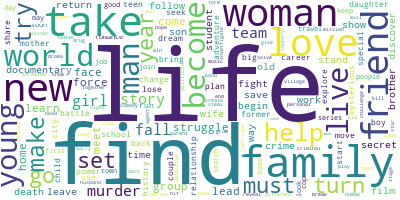

In [56]:
# Import the wordcloud library
from wordcloud import WordCloud
import itertools

# Join the different processed titles together
list_of_words = list(itertools.chain.from_iterable(data_lemmatized))
long_string = ','.join(word for word in list_of_words)
long_string

# # Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', collocations = False,  random_state=1)

# # Generate a word cloud
wordcloud.generate(long_string)

# # Visualize the word cloud
wordcloud.to_image()

In [57]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Filter out tokens that appear in only 1 documents and appear in more than 90% of the documents
id2word.filter_extremes(no_below=2, no_above=0.9)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:10])
# print(id2word[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(32, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(13, 1), (15, 1), (47, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1)], [(18, 1), (30, 1), (49, 1), (51, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)]]


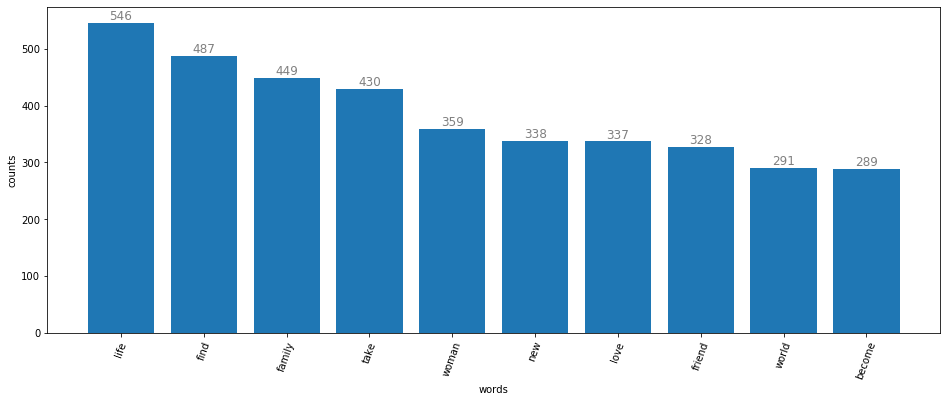

In [58]:
import operator


word_freq = []
word_list = []
count_dict = {}
for n in id2word.values():
    count_dict[n] = list_of_words.count(n)
sorted_dict = sorted(count_dict.items(), key=operator.itemgetter(1), reverse=True)[0:10]

plt.figure(figsize=(16,6))
plt.bar(range(len(sorted_dict)), [val[1] for val in sorted_dict], align='center')
plt.xticks(range(len(sorted_dict)), [val[0] for val in sorted_dict])
plt.xticks(rotation=70)
plt.xlabel('words')
plt.ylabel('counts')

# setting data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='grey', ha='center', va='bottom')
    
plt.show()


#### 2.3 Hyperparameter Tuning for LDA Model

In [82]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [83]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"take" + 0.011*"former" + 0.009*"find" + 0.009*"family" + '
  '0.008*"head" + 0.008*"criminal" + 0.008*"get" + 0.008*"help" + '
  '0.008*"prison" + 0.007*"join"'),
 (1,
  '0.027*"life" + 0.017*"love" + 0.017*"man" + 0.013*"woman" + 0.011*"family" '
  '+ 0.010*"lead" + 0.010*"find" + 0.009*"fall" + 0.009*"relationship" + '
  '0.008*"live"'),
 (2,
  '0.016*"use" + 0.015*"new" + 0.015*"become" + 0.014*"friend" + '
  '0.012*"mission" + 0.012*"world" + 0.009*"magical" + 0.009*"series" + '
  '0.009*"power" + 0.009*"student"'),
 (3,
  '0.013*"father" + 0.012*"kid" + 0.011*"child" + 0.011*"form" + 0.009*"track" '
  '+ 0.009*"turn" + 0.008*"plot" + 0.008*"adventure" + 0.007*"wild" + '
  '0.007*"singer"'),
 (4,
  '0.020*"challenge" + 0.014*"take" + 0.013*"crime" + 0.010*"spend" + '
  '0.009*"legendary" + 0.009*"train" + 0.008*"compete" + 0.008*"fellow" + '
  '0.008*"face" + 0.008*"competition"'),
 (5,
  '0.015*"life" + 0.014*"love" + 0.012*"together" + 0.011*"live" + '
  '0.011*"wo

In [84]:
# Evaluate base model- Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3396080021145461


In [88]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [95]:
# Iterate over possible number of topics. takes about 2-3mins
topic_param = [0,5,10,15,20,25,30,35,40]
coherence_score = []

for k in topic_param:
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
    coherence_score.append(cv)

param_tuning_coherence = pd.DataFrame()
param_tuning_coherence["topic_param"] = topic_param
param_tuning_coherence['coherence_score'] = coherence_score
param_tuning_coherence

,topic_param,coherence_score
0,0,0.313295
1,5,0.320894
2,10,0.317579
3,15,0.335792
4,20,0.314515
5,25,0.330614
6,30,0.329774
7,35,0.314940
8,40,0.313403


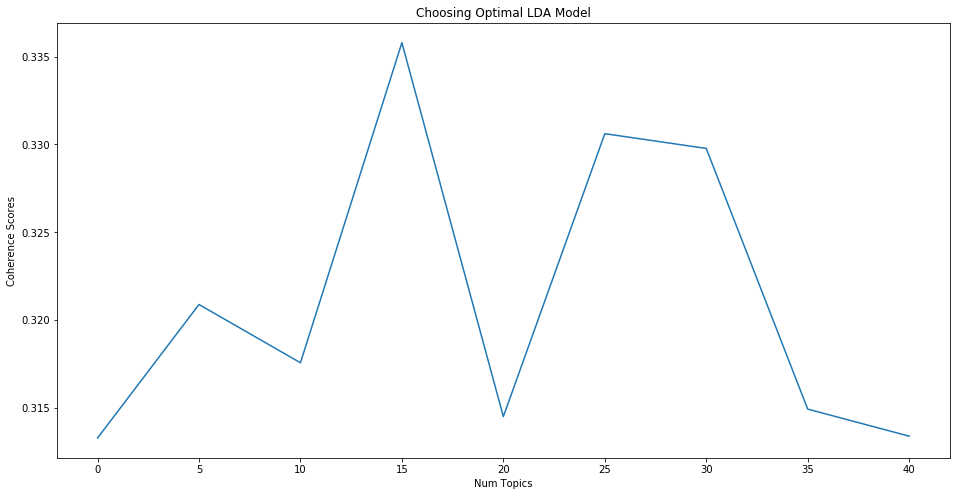

In [96]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(topic_param, param_tuning_coherence['coherence_score'])

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Scores")
plt.show()



#### 2.4 Final LDA Model

In [65]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [97]:
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"take" + 0.011*"former" + 0.009*"find" + 0.009*"family" + '
  '0.008*"head" + 0.008*"criminal" + 0.008*"get" + 0.008*"help" + '
  '0.008*"prison" + 0.007*"join"'),
 (1,
  '0.027*"life" + 0.017*"love" + 0.017*"man" + 0.013*"woman" + 0.011*"family" '
  '+ 0.010*"lead" + 0.010*"find" + 0.009*"fall" + 0.009*"relationship" + '
  '0.008*"live"'),
 (2,
  '0.016*"use" + 0.015*"new" + 0.015*"become" + 0.014*"friend" + '
  '0.012*"mission" + 0.012*"world" + 0.009*"magical" + 0.009*"series" + '
  '0.009*"power" + 0.009*"student"'),
 (3,
  '0.013*"father" + 0.012*"kid" + 0.011*"child" + 0.011*"form" + 0.009*"track" '
  '+ 0.009*"turn" + 0.008*"plot" + 0.008*"adventure" + 0.007*"wild" + '
  '0.007*"singer"'),
 (4,
  '0.020*"challenge" + 0.014*"take" + 0.013*"crime" + 0.010*"spend" + '
  '0.009*"legendary" + 0.009*"train" + 0.008*"compete" + 0.008*"fellow" + '
  '0.008*"face" + 0.008*"competition"'),
 (5,
  '0.015*"life" + 0.014*"love" + 0.012*"together" + 0.011*"live" + '
  '0.011*"wo

In [67]:
def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1], reverse = True))   

In [68]:
doc_num, topic_num, prob = [], [], []
print(lda_model.get_document_topics(corpus))
for n in range(len(df)):
    get_document_topics = lda_model.get_document_topics(corpus[n])
    doc_num.append(n)
    sorted_doc_topics = Sort_Tuple(get_document_topics)
    topic_num.append(sorted_doc_topics[0][0])
    prob.append(sorted_doc_topics[0][1])
df['Doc'] = doc_num
df['Topic'] = topic_num
df['Probability'] = prob
df.to_csv("doc_topic_matrix.csv", index=False)

#### 2.5 Visualize Topics

In [69]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.011541  0.021120       1        1   7.976277
1      0.140267 -0.004577       2        1  24.263128
2     -0.037156 -0.006542       3        1   0.596062
3     -0.037200 -0.003254       4        1   0.659493
4     -0.046091  0.000655       5        1   1.555205
5     -0.042552 -0.001680       6        1   1.722683
6     -0.034967 -0.004839       7        1   0.476211
7      0.123629  0.065671       8        1  21.841116
8     -0.058656  0.012126       9        1   4.218124
9      0.017983 -0.030091      10        1   8.320969
10    -0.002038  0.074269      11        1  11.622660
11    -0.032985 -0.005291      12        1   0.300830
12    -0.037936 -0.004445      13        1   0.600830
13    -0.031347 -0.004066      14        1   0.116602
14     0.067507 -0.109056      15        1  15.729803, topic_info=       Term        Freq       Total Category  logprob  loglift
154    love  234.000000  234.000000  Default  30.0000  30.0000
25     show   64.000000   64.000000  Default  29.0000  29.0000
95    story  103.000000  103.000000  Default  28.0000  28.0000
69    stand   50.000000   50.000000  Default  27.0000  27.0000
47   family  326.000000  326.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
64    group   30.260328  122.953255  Topic15  -5.7595   0.4476
253    teen   28.333588   90.804718  Topic15  -5.8252   0.6849
284     cop   27.504139   66.695114  Topic15  -5.8550   0.9638
47   family   28.235703  326.957947  Topic15  -5.8287  -0.5996
177     new   27.679527  273.588501  Topic15  -5.8486  -0.4413

[776 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1100      2  0.084604  abuse
1100      8  0.084604  abuse
1100     10  0.592226  abuse
1100     11  0.084604  abuse
1100     15  0.084604  abuse
...     ...       ...    ...
53        2  0.359812  young
53        8  0.354441  young
53       10  0.102036  young
53       11  0.026852  young
53       15  0.123517  young

[3654 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

#### 2.6  Top 10 recommended tv shows/movies based on topic modelling

In [98]:
def recommend_by_storyline(title, df):
    recommended = []
    top10_list = []
    
    title = title.lower()
    df['title'] = df['title'].str.lower()
    topic_num = df[df['title']==title].Topic.values
    doc_num = df[df['title']==title].Doc.values    
    
    output_df = df[df['Topic']==topic_num[0]].sort_values('Probability', ascending=False).reset_index(drop=True)

    index = output_df[output_df['Doc']==doc_num[0]].index[0]
    
    top10_list += list(output_df.iloc[index-5:index].index)
    top10_list += list(output_df.iloc[index+1:index+6].index)
    
    output_df['title'] = output_df['title'].str.title()
    
    for each in top10_list:
        recommended.append(output_df.iloc[each].title)
        
    return recommended


In [99]:
recommend_by_storyline("Avengers: Infinity War", df)

['The Seven Deadly Sins',
 'Ninja Turtles: The Next Mutation',
 'Super Monsters',
 'Cyborg 009 Vs Devilman',
 'Get Smart',
 "Oh No! It'S An Alien Invasion",
 'Svaha: The Sixth Finger',
 'Fullmetal Alchemist: Brotherhood',
 "Jake'S Buccaneer Blast",
 'Maharakshak: Aryan']

In [100]:
recommend_by_storyline("Naruto Shippuden : Blood Prison", df)

['La Viuda Negra',
 'Power Rangers Super Samurai: Trickster Treat',
 'Mighty Morphin Alien Rangers',
 'The Brave',
 'Saint Seiya: The Lost Canvas',
 'K-19: The Widowmaker',
 'Supernature: Wild Flyers',
 'Pukar',
 'Barbie: A Fairy Secret',
 'Sarajevo']